<a href="https://colab.research.google.com/github/Ruthalasridivy/Data-science-task/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

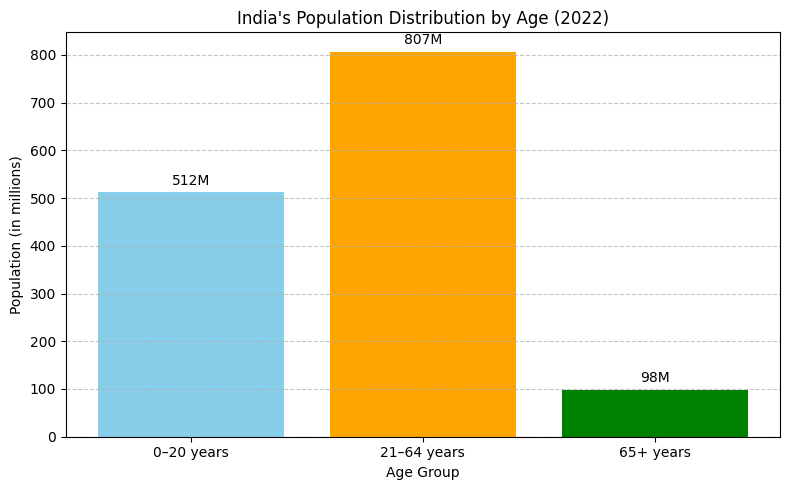

In [ ]:
import matplotlib.pyplot as plt

# Data
age_groups = ['0–20 years', '21–64 years', '65+ years']
population = [512, 807, 98]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(age_groups, population, color=['skyblue', 'orange', 'green'])

# Add labels
plt.title("India's Population Distribution by Age (2022)")
plt.xlabel("Age Group")
plt.ylabel("Population (in millions)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f'{yval}M', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Initial Data Head:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing Values Count:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who   

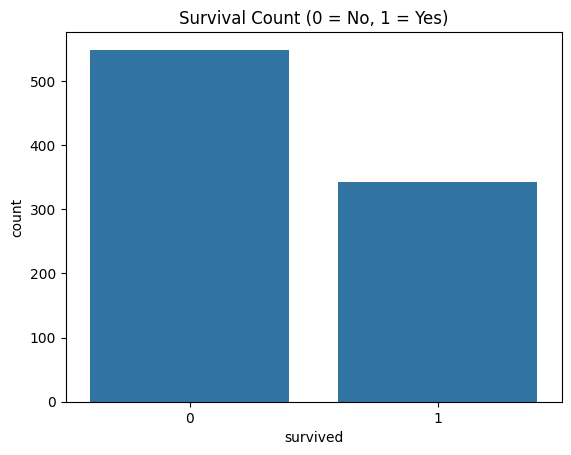

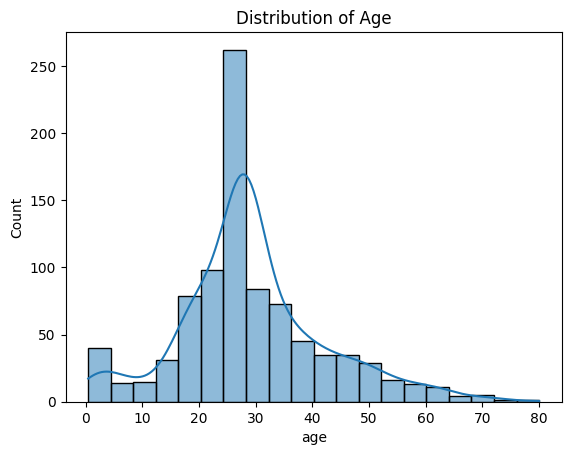

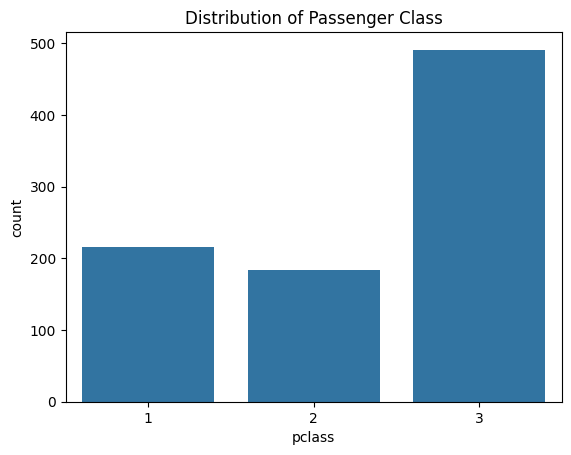

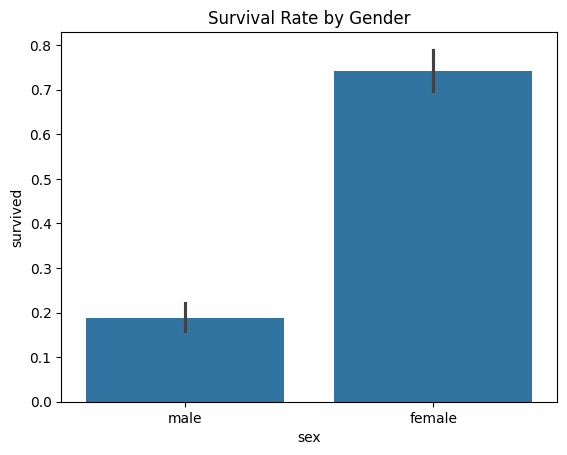

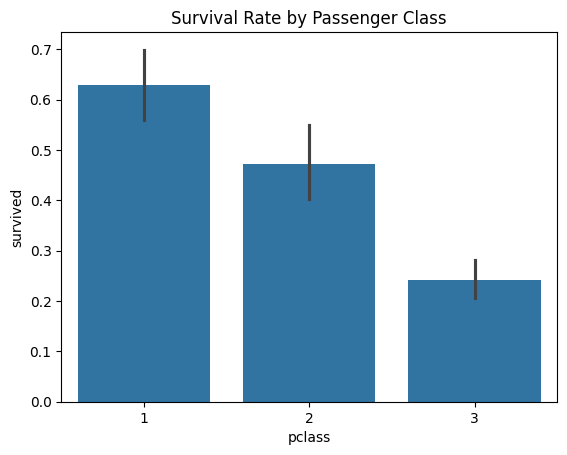

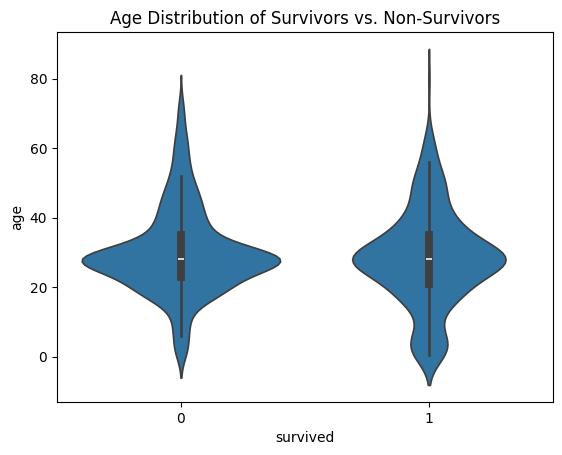

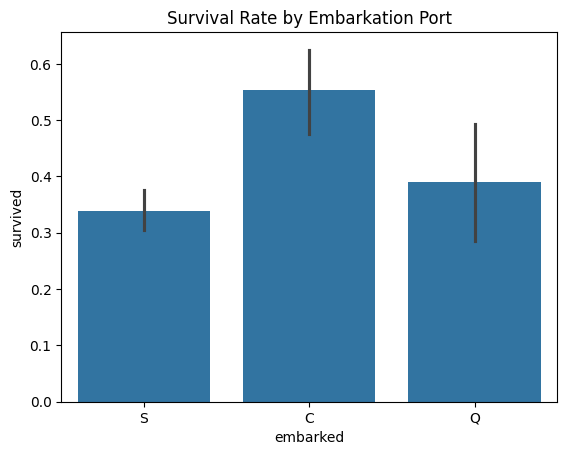

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
# Option 1: Load from Seaborn's built-in datasets
df = sns.load_dataset('titanic')

# Option 2: Load from a CSV file (if downloaded from Kaggle)
# df = pd.read_csv('titanic.csv')

# Display the first few rows to get a sense of the data
print("Initial Data Head:")
print(df.head())

print("\nMissing Values Count:")
print(df.isnull().sum())

# Handle 'age' missing values by filling with the median
df['age'] = df['age'].fillna(df['age'].median())

# Handle 'embarked' missing values by filling with the mode
most_frequent_embarked = df['embarked'].mode()[0]
df['embarked'] = df['embarked'].fillna(most_frequent_embarked)

# Drop the 'deck' column due to a high number of missing values
df.drop('deck', axis=1, inplace=True)

# Verify that missing values have been handled
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# Distribution of survival
sns.countplot(x='survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

# Distribution of Age (a continuous variable)
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.show()

# Distribution of Passenger Class (Pclass)
sns.countplot(x='pclass', data=df)
plt.title('Distribution of Passenger Class')
plt.show()
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()
sns.violinplot(x='survived', y='age', data=df)
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.show()
sns.barplot(x='embarked', y='survived', data=df)
plt.title('Survival Rate by Embarkation Port')
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

Accuracy: 0.8894149065307113

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.51      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



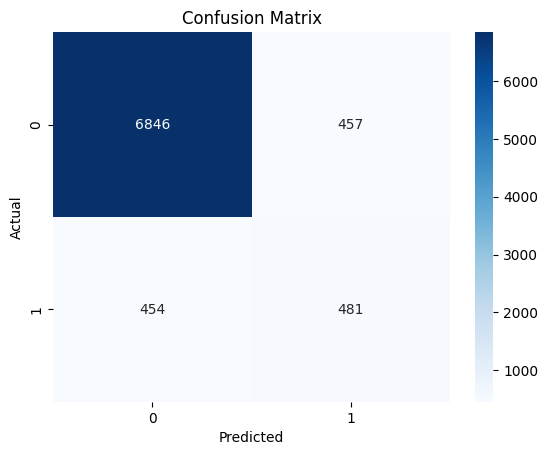

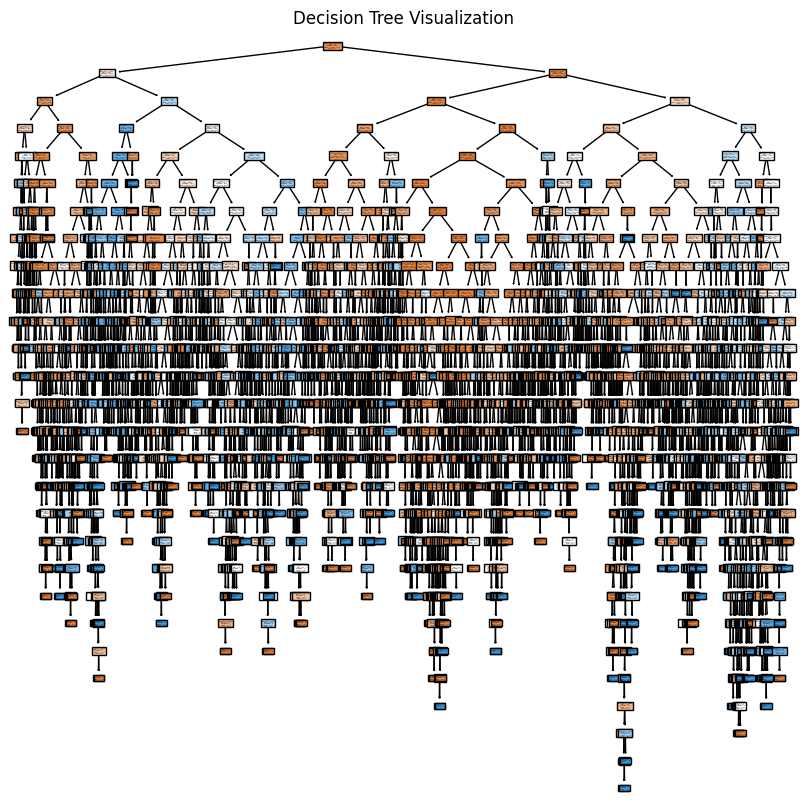

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import requests
import zipfile
import io

# Download the zip file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
response = requests.get(url)

# Extract the desired file from the zip
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open('bank-additional/bank-additional-full.csv') as f:
        # Read the csv into a pandas DataFrame
        data = pd.read_csv(f, sep=';')

# Preview the data
data.head()
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features and target
X = data.drop('y', axis=1)
y = data['y']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
plt.figure(figsize=(10,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

CSV file saved as 'enhanced_accident_dataset.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Accident_ID        50 non-null     int64 
 1   Date               50 non-null     object
 2   Location           50 non-null     object
 3   Severity           50 non-null     object
 4   Vehicles_Involved  50 non-null     int64 
 5   Casualties         50 non-null     int64 
 6   Weather            50 non-null     object
 7   Time_of_Day        50 non-null     object
 8   Road_Type          50 non-null     object
 9   Traffic_Signal     50 non-null     object
 10  Driver_Age_Group   50 non-null     object
dtypes: int64(3), object(8)
memory usage: 4.4+ KB


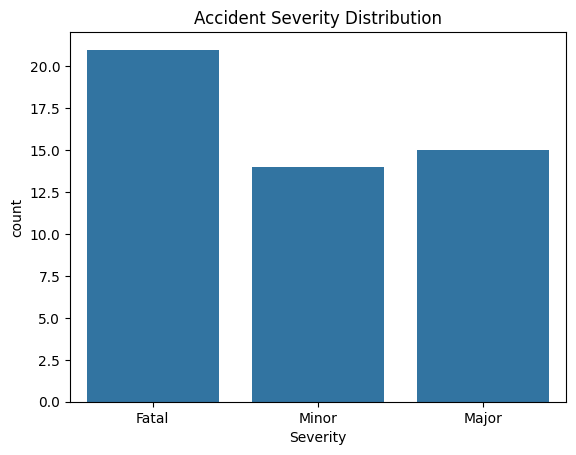

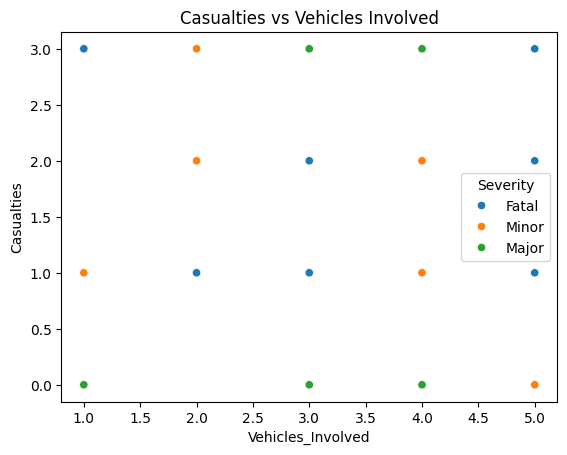

Accuracy: 1.0


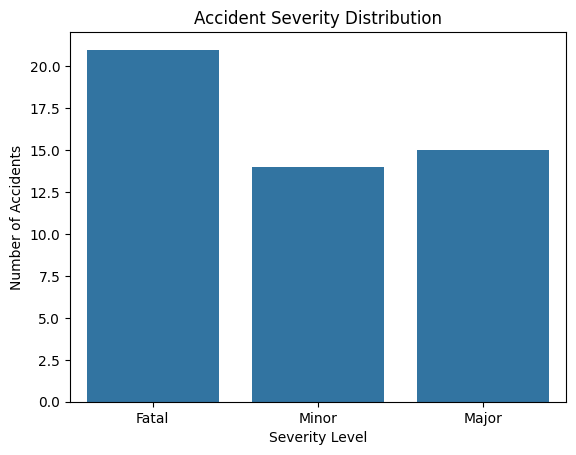

Weather
Foggy     2.166667
Cloudy    1.647059
Rainy     1.600000
Stormy    1.600000
Clear     1.583333
Name: Casualties, dtype: float64


In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta

num_records = 50
start_date = datetime(2025, 1, 1)

locations = ["Delhi", "Mumbai", "Chennai", "Kolkata", "Hyderabad", "Bangalore", "Pune", "Ahmedabad", "Jaipur", "Lucknow"]
severities = ["Minor", "Major", "Fatal"]
weather_conditions = ["Clear", "Rainy", "Foggy", "Stormy", "Cloudy"]
time_of_day = ["Morning", "Afternoon", "Evening", "Night"]
road_types = ["Highway", "City Road", "Rural Road", "Residential"]
traffic_signal = ["Yes", "No"]
driver_age_group = ["<18", "18-25", "26-40", "41-60", "60+"]

data = {
    "Accident_ID": [1000 + i for i in range(num_records)],
    "Date": [(start_date + timedelta(days=i)).strftime("%Y-%m-%d") for i in range(num_records)],
    "Location": random.choices(locations, k=num_records),
    "Severity": random.choices(severities, k=num_records),
    "Vehicles_Involved": [random.randint(1, 5) for _ in range(num_records)],
    "Casualties": [random.randint(0, 3) for _ in range(num_records)],
    "Weather": random.choices(weather_conditions, k=num_records),
    "Time_of_Day": random.choices(time_of_day, k=num_records),
    "Road_Type": random.choices(road_types, k=num_records),
    "Traffic_Signal": random.choices(traffic_signal, k=num_records),
    "Driver_Age_Group": random.choices(driver_age_group, k=num_records)
}

df = pd.DataFrame(data)

df.head()
df.to_csv("enhanced_accident_dataset.csv", index=False)
print("CSV file saved as 'enhanced_accident_dataset.csv'")
from google.colab import files
files.download("enhanced_accident_dataset.csv")
import pandas as pd

# Load the CSV file
df = pd.read_csv("enhanced_accident_dataset.csv")

# Preview the data
df.head()
df.info()
df.describe(include='all')
df.isnull().sum()
df['Date'] = pd.to_datetime(df['Date'])


df_encoded = pd.get_dummies(df, drop_first=True)


import matplotlib.pyplot as plt
import seaborn as sns

# Severity distribution
sns.countplot(x='Severity', data=df)
plt.title("Accident Severity Distribution")
plt.show()

# Casualties vs. Vehicles involved
sns.scatterplot(x='Vehicles_Involved', y='Casualties', hue='Severity', data=df)
plt.title("Casualties vs Vehicles Involved")
plt.show()
df.groupby(['Location', 'Severity']).size().unstack().fillna(0)
df.groupby('Weather')['Casualties'].mean()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Example: Predict Severity
# Drop one of the severity columns from features (X) to avoid multicollinearity
X = df_encoded.drop(['Severity_Minor', 'Accident_ID', 'Date'], axis=1)  # Adjust target column
y = df_encoded['Severity_Major'] # Select 'Severity_Major' as the target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Severity', data=df)
plt.title("Accident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()
casualties_by_weather = df.groupby('Weather')['Casualties'].mean().sort_values(ascending=False)
print(casualties_by_weather)